**Redes Neuronales**

Actividad: PIA

Ing. Tomás Eloy Salais Fierro

Integrantes:

Lucía Garza Garza 1956237

Jorge Eduardo Muñoz Garza 2077981

Ana Luisa Garza Díaz 1948335


#Instalación de librerías.

In [1]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import datasets, layers, models, utils, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


#Descarga de datos del repositorio de Kaggle.

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d pkdarabi/bone-break-classification-image-dataset

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/bone-break-classification-image-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 98% 28.0M/28.4M [00:02<00:00, 23.5MB/s]
100% 28.4M/28.4M [00:02<00:00, 11.2MB/s]


In [4]:
!unzip -o "bone-break-classification-image-dataset.zip"

Archive:  bone-break-classification-image-dataset.zip
  inflating: Bone Break Classification/Bone Break Classification/Avulsion fracture/Test/000002_png.rf.c3e00ebc2db78bc94e644c3f6605dad0.jpg  
  inflating: Bone Break Classification/Bone Break Classification/Avulsion fracture/Test/05cc2e0302957e0ad27edb6b9ffbc2_jumbo_jpg.rf.c15eb3758845b639f3aaba73c373501d.jpg  
  inflating: Bone Break Classification/Bone Break Classification/Avulsion fracture/Test/1-s2-0-S0899707114002836-gr2_jpg.rf.bb8ed4dee892edbb760f6ce687d74ba5.jpg  
  inflating: Bone Break Classification/Bone Break Classification/Avulsion fracture/Test/13256_2019_2325_Fig1_HTML_png.rf.09368fddb2da3979a35a0cac6f45.jpg  
  inflating: Bone Break Classification/Bone Break Classification/Avulsion fracture/Test/13256_2019_2325_Fig1_HTML_png.rf.09368fddb2da3979a3e1e25a0cac6f45.jpg  
  inflating: Bone Break Classification/Bone Break Classification/Avulsion fracture/Test/1b62e6fbfbc5a2f70c6af413189cfc82_jpg.rf.2761e933cc6d206308877cccaf0

In [5]:
!ls

'Bone Break Classification'		       README.dataset.txt
 bone-break-classification-image-dataset.zip   sample_data


In [6]:
!kaggle datasets download -d devbatrax/fracture-detection-using-x-ray-images

Dataset URL: https://www.kaggle.com/datasets/devbatrax/fracture-detection-using-x-ray-images
License(s): Apache 2.0
100% 172M/172M [00:05<00:00, 45.3MB/s]
100% 172M/172M [00:05<00:00, 34.2MB/s]


In [7]:
!ls

'Bone Break Classification'		       README.dataset.txt
 bone-break-classification-image-dataset.zip   sample_data
 fracture-detection-using-x-ray-images.zip


In [8]:
!unzip -o "fracture-detection-using-x-ray-images.zip"

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: data/train/fractured/99-rotated2-rotated3-rotated3.jpg  
  inflating: data/train/fractured/99-rotated2-rotated3.jpg  
  inflating: data/train/fractured/99-rotated2.jpg  
  inflating: data/train/fractured/99-rotated3-rotated1-rotated1.jpg  
  inflating: data/train/fractured/99-rotated3-rotated1-rotated2.jpg  
  inflating: data/train/fractured/99-rotated3-rotated1-rotated3.jpg  
  inflating: data/train/fractured/99-rotated3-rotated1.jpg  
  inflating: data/train/fractured/99-rotated3-rotated2-rotated1.jpg  
  inflating: data/train/fractured/99-rotated3-rotated2-rotated2.jpg  
  inflating: data/train/fractured/99-rotated3-rotated2-rotated3.jpg  
  inflating: data/train/fractured/99-rotated3-rotated2.jpg  
  inflating: data/train/fractured/99-rotated3-rotated3-rotated1.jpg  
  inflating: data/train/fractured/99-rotated3-rotated3-rotated2.jpg  
  inflating: data/train/fractured/99-rotated3-rotated3-rotated3.jpg  
  in

In [9]:
!mkdir -p "/content/Bone Break Classification/Bone Break Classification/No Fracture"  # Crear carpeta

In [10]:
!mv "/content/data/train/not fractured" "/content/Bone Break Classification/Bone Break Classification/No Fracture"

In [11]:
!mv "/content/Bone Break Classification/Bone Break Classification/No Fracture/not fractured" "/content/Bone Break Classification/Bone Break Classification/No Fracture/Train"  # Renombrar

In [12]:
!mv "/content/data/val/not fractured" "/content/Bone Break Classification/Bone Break Classification/No Fracture"

In [13]:
!mv "/content/Bone Break Classification/Bone Break Classification/No Fracture/not fractured" "/content/Bone Break Classification/Bone Break Classification/No Fracture/Test"  # Renombrar

In [14]:
#!rm -r "/content/data/train/carpeta_a_eliminar"  # Eliminar

# Cargar y etiquetar imágenes

In [15]:
data_dir = "/content/Bone Break Classification/Bone Break Classification"


#Cargar imagenes de entrenamiento y validación
train_data = utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(100,100),
    batch_size=64,
    seed=40
)


validation_data = utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="validation",
    color_mode="rgb",
    image_size=(100,100),
    batch_size=64,
    seed=42
)

Found 5752 files belonging to 11 classes.
Using 5177 files for training.
Found 5752 files belonging to 11 classes.
Using 575 files for validation.


In [16]:
# Buscar clases
class_names = train_data.class_names
print("Class names:", class_names)

Class names: ['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'No Fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


In [17]:
# Normalización
def preprocess(img):
    img = tf.cast(img, "float32") / 255.0
    return img

train_dataset = train_data.map(lambda x, y: (preprocess(x), y))
val_dataset = validation_data.map(lambda x, y: (preprocess(x), y))

Acomodo de etiquetas e imagenes en arreglos

In [18]:
x_train = []
y_train = []

for images, labels in train_dataset:
    #append train data to x_train
    x_train.append(images.numpy())

    #append labels to y_train
    y_train.append(labels.numpy())

x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

In [19]:
x_val = []
y_val = []

for images, labels in val_dataset:
    #append train data to x_train
    x_val.append(images.numpy())

    #append labels to y_train
    y_val.append(labels.numpy())


x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

In [20]:
print(len(x_val))

575


In [21]:
# Definición de clases
class_names_dict = {
    0: 'Avulsion fracture',
    1: 'Comminuted fracture',
    2: 'Fracture Dislocation',
    3: 'Greenstick fracture',
    4: 'Hairline Fracture',
    5: 'Impacted fracture',
    6: 'Longitudinal fracture',
    7: 'No fracture',
    8: 'Oblique fracture',
    9: 'Pathological fracture',
    10: 'Spiral Fracture'
}

Comprobación de imagenes

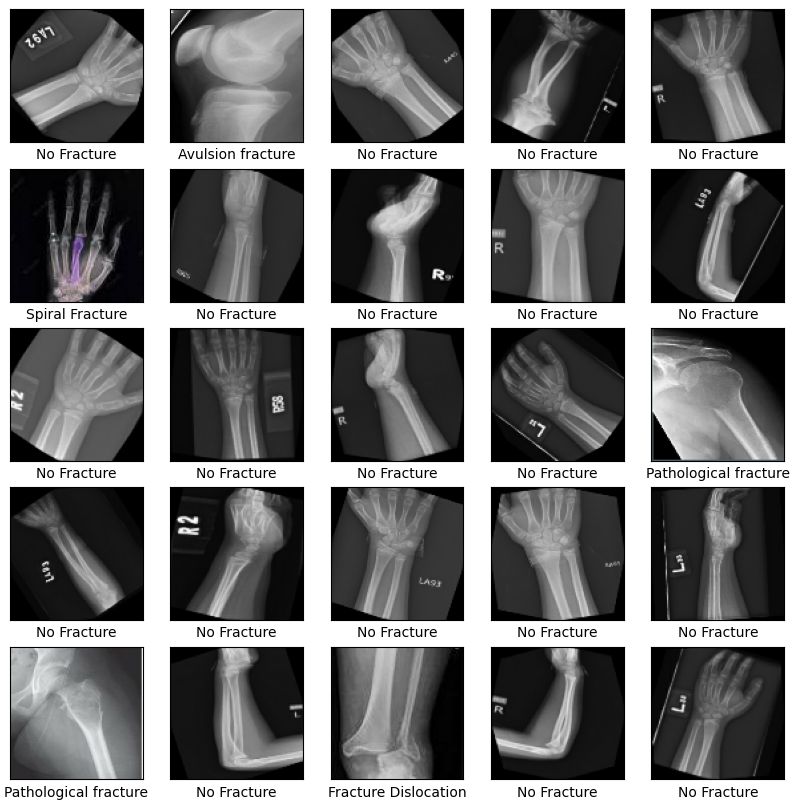

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_val[i], cmap='gray')

    plt.xlabel(class_names[y_val[i]])
plt.show()

In [23]:
x_train.shape

(5177, 100, 100, 3)

In [24]:
NUM_CLASSES = len(class_names)

train_labels = utils.to_categorical(y_train, NUM_CLASSES)
test_labels = utils.to_categorical(y_val, NUM_CLASSES)

#Construir modelo de la red neuronal

In [25]:

# Construcción del modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(momentum=0.9),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(momentum=0.9),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(momentum=0.9),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.BatchNormalization(momentum=0.9),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(momentum=0.9),
    layers.Dropout(0.5),

    layers.Dense(len(class_names), activation='softmax')
])

# Compilar el modelo
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
]



In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 49, 49, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                        

In [27]:
# Entrenar el modelo sin aumento de datos
history = model.fit( x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), callbacks=callbacks)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_val, y_val)
print('Test accuracy:', test_acc)

Epoch 1/10
162/162 [==============================] - 141s 849ms/step - loss: 2.5083 - accuracy: 0.3608 - val_loss: 1.1613 - val_accuracy: 0.7687
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


162/162 [==============================] - 127s 783ms/step - loss: 1.5007 - accuracy: 0.6222 - val_loss: 0.6961 - val_accuracy: 0.8330
Epoch 3/10
162/162 [==============================] - 124s 769ms/step - loss: 1.1490 - accuracy: 0.7350 - val_loss: 0.5412 - val_accuracy: 0.8643
Epoch 4/10
162/162 [==============================] - 128s 793ms/step - loss: 0.9523 - accuracy: 0.7771 - val_loss: 0.4679 - val_accuracy: 0.8696
Epoch 5/10
162/162 [==============================] - 127s 781ms/step - loss: 0.8273 - accuracy: 0.8053 - val_loss: 0.4037 - val_accuracy: 0.8748
Epoch 6/10
162/162 [==============================] - 124s 766ms/step - loss: 0.7551 - accuracy: 0.8300 - val_loss: 0.3659 - val_accuracy: 0.8904
Epoch 7/10
162/162 [==============================] - 126s 779ms/step - loss: 0.6844 - accuracy: 0.8341 - val_loss: 0.3606 - val_accuracy: 0.8870
Epoch 8/10
162/162 [==============================] - 124s 764ms/step - loss: 0.6492 - accuracy: 0.8366 - val_loss: 0.3251 - val_accura

# Precisión y Pérdida: Entrenamiento VS Validación

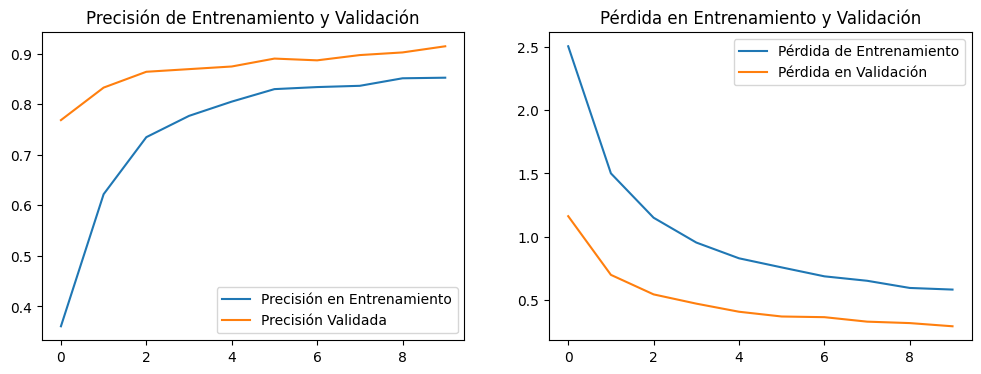

In [28]:
# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validada')
plt.legend(loc='lower right')
plt.title('Precisión de Entrenamiento y Validación')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.legend(loc='upper right')
plt.title('Pérdida en Entrenamiento y Validación')
plt.show()

# Predicciones

In [29]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [30]:
results = probability_model.predict(x_val)

18/18 [==============================] - 3s 178ms/step


In [31]:
results[3]

array([0.07869297, 0.0787079 , 0.07867411, 0.07870326, 0.07868779,
       0.07867122, 0.07869452, 0.21307494, 0.07867084, 0.0787314 ,
       0.07869103], dtype=float32)

Otra forma

In [32]:
predictions = model.predict(x_val)

18/18 [==============================] - 5s 279ms/step


In [33]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(11))
  plt.yticks([])
  thisplot = plt.bar(range(11), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

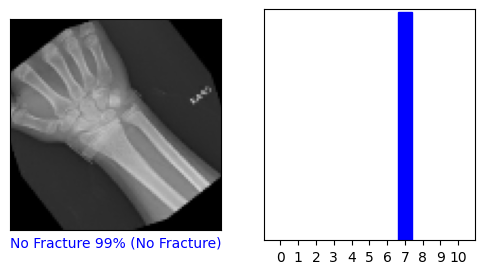

In [34]:
i = 2


plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_val, x_val)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_val)
plt.show()

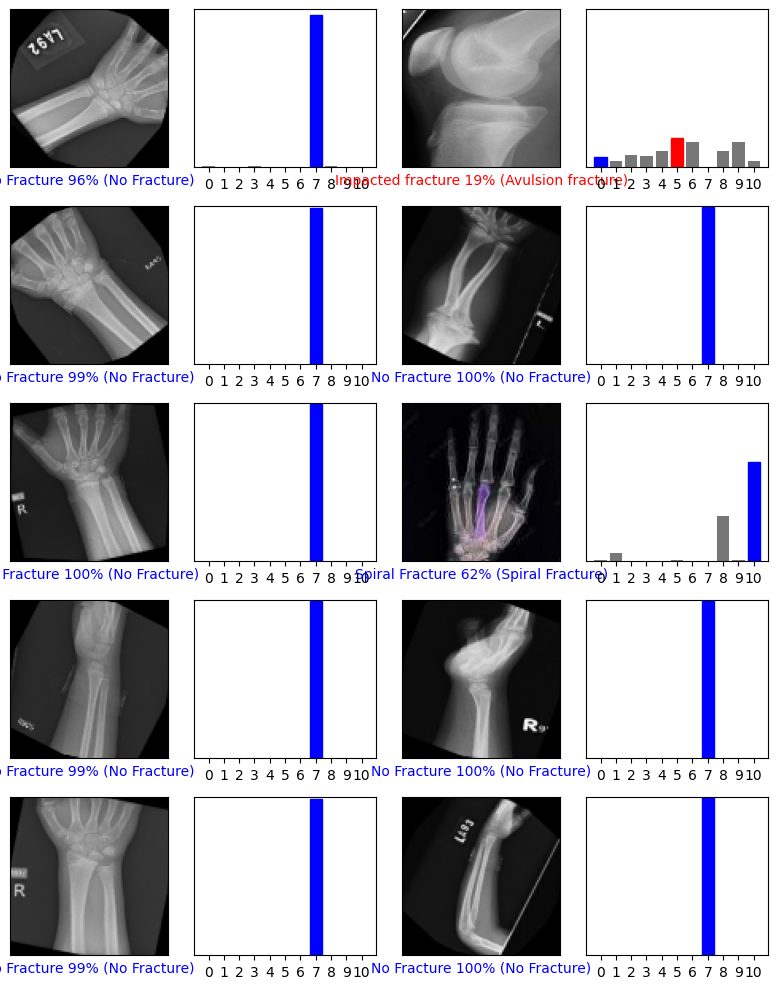

In [42]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_val, x_val)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_val)
plt.tight_layout()
plt.show()